In [1]:
%store -r df

In [2]:
df = df
display(df.head())

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


In [3]:
import numpy as np
import pandas as pd
import src.operaciones as op
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

#Primero un mapa interactivo en el que se puede obsrevar las diferentes áreas y cuales están más frecuentadas
lats2019 = df['latitude'].tolist()
long2019 = df['longitude'].tolist()
locations = list(zip(lats2019, long2019))
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
map1 = folium.Map(location=[40.71427, -74.00597], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [5]:
#Con este dataset se pretende demostrar que el mejor lugar para comprar casas dentro de NY y ponerlas de airbnb es Manhattan
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Please select the neighbourhodod: 
Manhattan


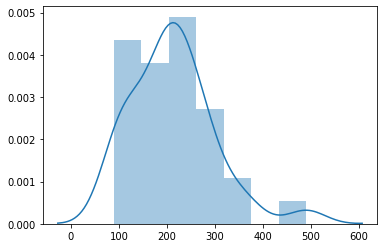

In [6]:
#Este es un gráfico en el que puedes meter como input las diferentes zonas de NY y te devuelve su distribución.
op.price_distribution(df, input)

In [7]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

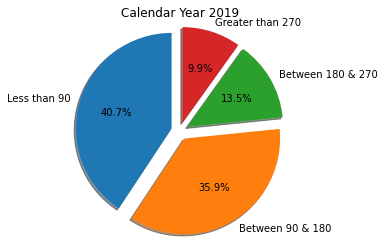

In [8]:
#Gráfico 'pie' que indica o bien el availability_365 o los precios en función de lo que le pidas.
op.pie_chart_price_availability(df, 'price')

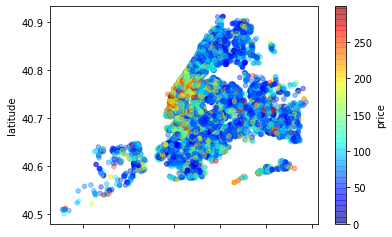

In [9]:
#Mapa de calor que indica las zonas que mayor price/availability_365 hay en NY
op.data_zone(df, 'price', 300 )

Text(0.5, 0, 'Neighbourhood')

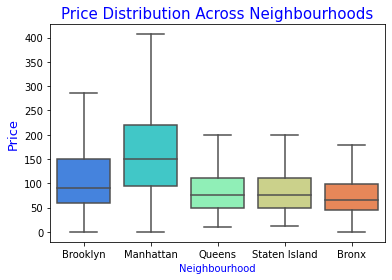

In [10]:
#Boxplot en el que se muestran la distribución por precios a lo largo de los diferntes barrios
stick_price = sns.boxplot(x='neighbourhood_group',y='price',data=df,palette='rainbow',showfliers=False)
stick_price.set_title('Price Distribution Across Neighbourhoods',fontsize=15,color='blue')
stick_price.set_ylabel('Price',color='blue', fontsize=13)
stick_price.set_xlabel('Neighbourhood',color='blue')

Text(0.5, 0, 'Room type')

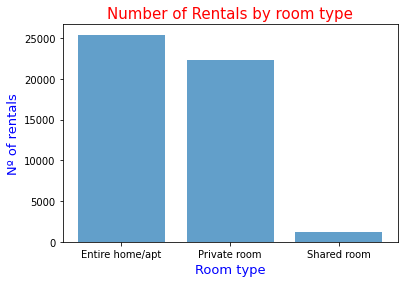

In [11]:
#Gráfico que muestra las reservas por tipo de habitación 
grouped_byroom = df.groupby('room_type').agg(['count'])
plt.bar(x=grouped_byroom.index, height=grouped_byroom['name']['count'], alpha=.7)
plt.title('Number of Rentals by room type', color='red', fontsize=15)
plt.ylabel('Nº of rentals', color='blue', fontsize=13)
plt.xlabel('Room type',color='blue', fontsize=13)

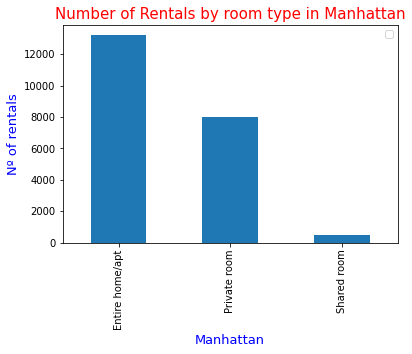

In [12]:
#Número de alquileres por tipo de habitación en Manhattan
neighbourhood_roomt = df[df["neighbourhood_group"] == 'Manhattan'][["room_type","price"]]
grouped_byroom = neighbourhood_roomt.groupby(['room_type']).agg(['count'])
grouped_byroom.plot(kind='bar')
plt.title('Number of Rentals by room type in Manhattan', color='red', fontsize=15)
plt.ylabel('Nº of rentals', color='blue', fontsize=13)
plt.xlabel('Manhattan',color='blue', fontsize=13)
plt.legend('')

<AxesSubplot:xlabel='room_type'>

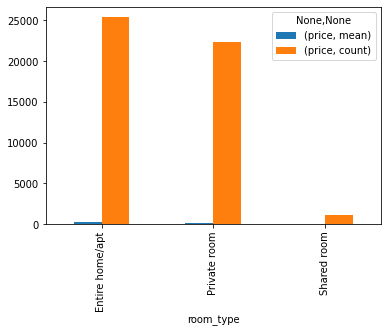

In [13]:
#Precio total y medio de los diferntes tipos de habitación
d={'price': ['mean' , 'count']}
price_property=df[['price','room_type']]
price_property_mean=price_property.groupby('room_type').agg(d).round(2)
price_property_mean.plot(kind='bar')

<AxesSubplot:xlabel='room_type', ylabel='price'>

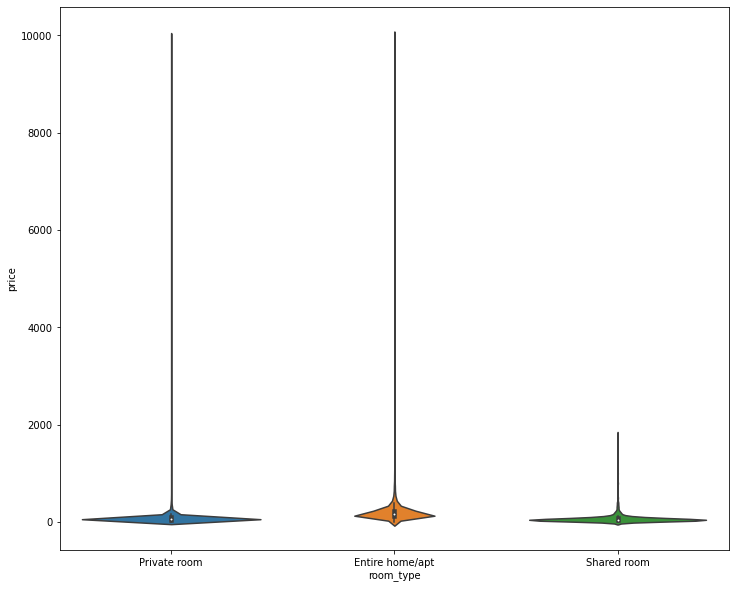

In [14]:
#Gráfico de violín entre room_type y precio
plt.figure(figsize=(12,10))
sns.violinplot(x='room_type',y='price',data=df)

<AxesSubplot:>

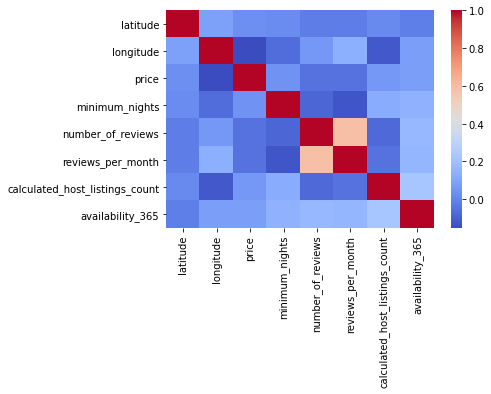

In [15]:
#índices de correlación entre variables
sns.heatmap(df.corr(),cmap='coolwarm')

In [16]:
room_pivot = pd.pivot_table(df,'price',['neighbourhood_group','room_type'],aggfunc=np.mean)
room_pivot.head()

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.506596
                    Private room      66.788344
                    Shared room       59.800000
Brooklyn            Entire home/apt  178.327545
                    Private room      76.500099